## Homework 4

## Name: Aishwarya Donegiri

## USC ID: 4640782493

### (f) Model trees with balanced dataset using Weka

In [1]:
import pandas as pd
import numpy as np

In [2]:
import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['E:\\MS\\ML\\HW4\\env\\Lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'E:\\MS\\ML\\HW4\\env\\Lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'E:\\MS\\ML\\HW4\\env\\Lib\\site-packages\\javabridge\\jars\\cpython.jar', 'E:\\MS\\ML\\HW4\\env\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'E:\\MS\\ML\\HW4\\env\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [3]:
import weka.core.converters as converters
from weka.classifiers import Classifier, Evaluation, Random
import weka.plot.classifiers as plt

In [11]:
train=pd.read_csv("../data/aps_failure_training_set_imputed.csv")
train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,neg
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,neg
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,neg
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,neg
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0,neg
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0,neg
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0,neg
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0,neg


In [12]:
test=pd.read_csv("../data/aps_failure_testing_set_imputed.csv")
test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0,neg
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0,neg
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0,neg
3,59816.0,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0,neg
4,1814.0,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0,neg
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,neg
15997,79636.0,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0,neg
15998,110.0,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,neg


### Applying SMOTE to balance imbalanced dataset

In [13]:
from imblearn.over_sampling import SMOTE

In [15]:
smote=SMOTE()
X_sm,y_sm=smote.fit_resample(train.iloc[:,:-1],train.iloc[:,-1])
train_sm=pd.concat([X_sm,y_sm],axis=1)
train_sm

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,7.669800e+04,0.713189,2.130706e+09,280.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,4.933840e+05,7.210440e+05,4.697920e+05,3.391560e+05,1.579560e+05,7.322400e+04,0.000000,0.000000,0.000000,neg
1,3.305800e+04,0.713189,0.000000e+00,190620.639314,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,1.780640e+05,2.933060e+05,2.454160e+05,1.336540e+05,8.114000e+04,9.757600e+04,1500.000000,0.000000,0.000000,neg
2,4.104000e+04,0.713189,2.280000e+02,100.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,1.598120e+05,4.239920e+05,4.095640e+05,3.207460e+05,1.580220e+05,9.512800e+04,514.000000,0.000000,0.000000,neg
3,1.200000e+01,0.000000,7.000000e+01,66.000000,0.00000,10.000000,0.000000,0.000000,0.000000,3.180000e+02,...,4.600000e+01,5.800000e+01,4.400000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,4.000000,32.000000,neg
4,6.087400e+04,0.713189,1.368000e+03,458.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,2.297900e+05,4.052980e+05,3.471880e+05,2.869540e+05,3.115600e+05,4.339540e+05,1218.000000,0.000000,0.000000,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117995,3.871389e+05,0.713189,3.560143e+08,190620.639314,6.81913,11.006817,242.371826,451.626782,962.026912,3.898765e+03,...,1.976618e+06,2.699550e+06,2.278279e+06,5.461719e+05,1.975528e+05,1.529115e+04,291.730227,0.090579,0.212756,pos
117996,1.027115e+06,0.713189,1.285834e+02,147290.639387,0.00000,0.000000,50.529694,222.449716,1962.039370,2.019745e+04,...,5.906411e+05,1.605804e+06,9.700733e+05,2.526264e+05,9.048621e+04,3.282493e+04,1912.543921,0.000000,0.000000,pos
117997,1.027443e+06,0.713189,1.989057e+03,121566.672455,0.00000,0.000000,0.000000,20725.549962,659677.610898,6.516414e+06,...,1.579363e+06,5.297285e+06,9.752132e+06,1.049642e+07,8.030083e+06,2.153581e+05,216.904174,0.000000,0.000000,pos
117998,5.257588e+04,0.713189,3.513326e+03,49006.678045,0.00000,0.000000,0.000000,0.000000,567.603711,3.926635e+04,...,8.178061e+04,5.743260e+04,9.147121e+03,2.048367e+03,6.684916e+02,3.943580e+02,0.000000,0.000000,0.000000,pos


In [16]:
train_sm.to_csv("../data/aps_failure_training_set_smoted.csv",index=False)

In [17]:
train_dataset=converters.load_any_file("../data/aps_failure_training_set_smoted.csv")

In [18]:
test_dataset=converters.load_any_file("../data/aps_failure_testing_set_imputed.csv")

In [19]:
train_dataset.class_is_last()
classifier=Classifier('weka.classifiers.trees.LMT')
classifier.build_classifier(train_dataset)

evaluator=Evaluation(train_dataset)
evaluator.crossvalidate_model(classifier,train_dataset,5,Random(5))
train_error=evaluator.percent_incorrect
mae_train=evaluator.mean_absolute_error
con_matrix_train=evaluator.confusion_matrix
auc_train=evaluator.area_under_roc

In [20]:
print ("Train Accuracy : ",evaluator.percent_correct)
print ("Train Error : ",train_error)
print("Mean Absolute Error for train data : ",mae_train)
print ("Confusion matrix for train data : \n",con_matrix_train)
print ("AUC for train data :",auc_train(1))
print ("\nSummary : ")
print (evaluator.summary())

Train Accuracy :  98.43305084745762
Train Error :  1.5669491525423729
Mean Absolute Error for train data :  0.02599614771493378
Confusion matrix for train data : 
 [[58016.   984.]
 [  865. 58135.]]
AUC for train data : 0.9961437312553864

Summary : 

Correctly Classified Instances      116151               98.4331 %
Incorrectly Classified Instances      1849                1.5669 %
Kappa statistic                          0.9687
Mean absolute error                      0.026 
Root mean squared error                  0.1136
Relative absolute error                  5.1992 %
Root relative squared error             22.7112 %
Total Number of Instances           118000     



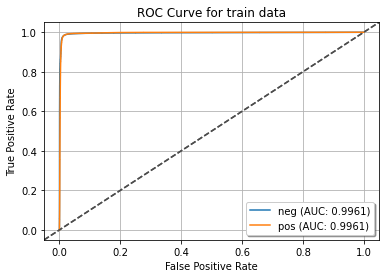

In [21]:
plt.plot_roc(evaluator,class_index=[0,1], title='ROC Curve for train data')

In [22]:
test_dataset.class_is_last()
evaluator_test=Evaluation(test_dataset)
evaluator_test.test_model(classifier,test_dataset)
test_error=evaluator_test.percent_incorrect
mae_test=evaluator_test.mean_absolute_error
con_matrix_test=evaluator_test.confusion_matrix
auc_test=evaluator_test.area_under_roc

In [23]:
print ("Test Accuracy : ",evaluator_test.percent_correct)
print ("Test Error : ",test_error)
print("Mean Absolute Error for test data : ",mae_test)
print ("Confusion matrix for test data : \n",con_matrix_test)
print ("AUC for test data :",auc_test(1))
print ("\nSummary : ")
print (evaluator_test.summary())

Test Accuracy :  97.50625
Test Error :  2.49375
Mean Absolute Error for test data :  0.03641725408978291
Confusion matrix for test data : 
 [[15256.   369.]
 [   30.   345.]]
AUC for test data : 0.9758318933333333

Summary : 

Correctly Classified Instances       15601               97.5062 %
Incorrectly Classified Instances       399                2.4937 %
Kappa statistic                          0.622 
Mean absolute error                      0.0364
Root mean squared error                  0.1405
Relative absolute error                 79.4562 %
Root relative squared error             92.85   %
Total Number of Instances            16000     



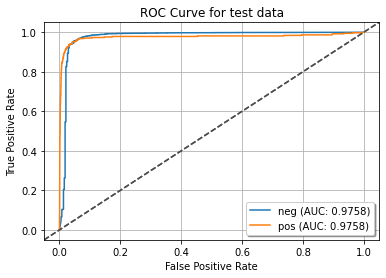

In [24]:
plt.plot_roc(evaluator_test,class_index=[0,1], title='ROC Curve for test data')